Imports

In [ ]:
import requests

from bs4 import BeautifulSoup

import pandas as pd

import unicodedata

import seaborn as sns


In [ ]:
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

Method fetches NCAA Statistics for a given player. Webscraped from sportsreference.com using Beautiful Soup


In [ ]:
def getFeatures(nameo, team):
  try:
    rightPlayer = True

    name= nameo.lower()

    name = name.replace('.','')

    name = name.replace(' jr','')

    name = name.replace('\'','')

    name = name.replace(' iii','')

    name = name.replace(' ii','')

    name = name.replace(' iv','')

    name = name.replace(' sr','')

    name = strip_accents(name)







    name = name.replace(' ', '-').lower()+'-'

    

    number = 1

    page = ''

    soup = ''

    while(rightPlayer):

      page = requests.get('https://www.sports-reference.com/cbb/players/'+name+str(number)+'.html')


      soup = BeautifulSoup(page.content, 'html.parser')

      teamCol = soup.find('td', {'data-stat' : 'school_name'})

      parsedTeam = teamCol.getText()

      if(parsedTeam.lower() == team.lower()):
        rightPlayer = False
      else:
        number+=1


    body = soup.find_all('body')[0]

    name = body.find('h1', itemprop = 'name')

    name = name.getText()[1:]

    nombre = name[:-1]
    firstDiv = body.find_all('div', id = 'info')

    paragraphData = firstDiv[0].find_all('p')

    strData = str(paragraphData[1])

    hwstr = strData[strData.index('(')+1:strData.index(')')]

    listofstuff = hwstr.split(',')

    fir = paragraphData[0]

    longThing = fir.getText()



    perGame = body.find_all('table', id = 'players_per_game')

    pG = perGame[0].find_all('tfoot')[0]

    tds = pG.find_all('td')

    gp = float(tds[2].getText())

    
    gs = float(tds[3].getText())

    ppg = pG.find('td',{'data-stat': 'pts_per_g'})

    ppg = float(ppg.getText())

    apg = pG.find('td',{'data-stat': 'ast_per_g'})

    apg = float(apg.getText())

    rpb = pG.find('td',{'data-stat': 'trb_per_g'})

    rpb = float(rpb.getText())

    tov = pG.find('td',{'data-stat': 'tov_per_g'})

    tov = float(tov.getText())

    stl = pG.find('td',{'data-stat': 'stl_per_g'})

    stl = float(stl.getText())

    blk = pG.find('td',{'data-stat': 'blk_per_g'})

    blk = float(blk.getText())

    mp = pG.find('td',{'data-stat': 'mp_per_g'})

    mp = float(mp.getText())

    fga = pG.find('td',{'data-stat': 'fga_per_g'})

    fga = float(fga.getText())

    fgp = pG.find('td',{'data-stat': 'fg_pct'})

    try:
      fgp = float(fgp.getText())
    except:
      fgp = 0

    fta = pG.find('td',{'data-stat': 'fta_per_g'})

    fta = float(fta.getText())

    ftp = pG.find('td',{'data-stat': 'ft_pct'})
    try:
      ftp = float(ftp.getText())

    except:
      ftp = 0

    fg3a = pG.find('td',{'data-stat': 'fg3a_per_g'})
    
    fg3a = float(fg3a.getText())

    fg3p = pG.find('td',{'data-stat': 'fg3_pct'})

    try:
      fg3p = float(fg3p.getText())

    except:
      fg3p = 0

    startRatio = gs/gp

    schoolName = pG.find('td',{'data-stat': 'school_name'}).getText()

    position = longThing[19:longThing.index('\n',19)]

    height = float(listofstuff[0][:3])

    weight = float(listofstuff[1][1:listofstuff[1].index('k')])


    data = []
    tempDict = {'Point': ppg, 'Assist' : apg, 'Rebound': rpb, 'Turnover': tov, 'Start Ratio': startRatio, 'MP': mp, 'FGA': fga, 'FGP': fgp, '3PA': fg3a, '3PP': fg3p, 'FTA': fta,'FTP': ftp, 'Steal': stl, 'Block': blk, 'Height': height, 'Weight': weight, 'Position': position, 'College Name': schoolName}
    data.append(tempDict)

    return tempDict


  except:
    pass


  
 
getFeatures('kelly Oubre', 'Kansas')



{'3PA': 2.6,
 '3PP': 0.358,
 'Assist': 0.8,
 'Block': 0.4,
 'College Name': 'Kansas',
 'FGA': 6.9,
 'FGP': 0.444,
 'FTA': 3.1,
 'FTP': 0.718,
 'Height': 201.0,
 'MP': 21.0,
 'Point': 9.3,
 'Position': 'Guard',
 'Rebound': 5.0,
 'Start Ratio': 0.75,
 'Steal': 1.1,
 'Turnover': 1.2,
 'Weight': 90.0}

Method creates unformatted player data related to all NBA Drafts past 2000

In [ ]:
def getPlayerData():
    liste = []
    names = []
    picks = []
    colleges = []

    year = 1990
    while(year!=2022): 
      url = 'https://www.basketball-reference.com/draft/NBA_' + str(year) + '.html'
      page = requests.get(url)
      soup = BeautifulSoup(page.text, 'html.parser')
      table = soup.find("table").find('tbody')
      #print(table.prettify())
      players = table.find_all("tr")
      
      for tr in players:
          
          name = tr.find('td', {'data-stat' : 'player'})
          college = tr.find('td', { 'data-stat' : 'college_name'})
          noCollege = tr.find('td', {'data-stat' : 'college_name', 'csk' : 'Zzz'})
          pick = (tr.find('td', {'data-stat' : 'pick_overall'}))
          
          
          if noCollege == None and name != None and pick != None:
              names.append(name.text)
              colleges.append(college.find('a').text)
              picks.append(float(pick.find('a').text))
            #print(pick.find('a').text, name.text, college.find('a').text)


      year+=1
    
    liste.append(names)
    
    liste.append(colleges)

    liste.append(picks)

    return liste


len(getPlayerData()[0])

1533

Method transforms disorganized data into a Pandas DataFrame

In [ ]:
def fullData(input):

  data = []
  for i in range(len(input[0])):
    try:
      tempDict  = getFeatures(input[0][i], input[1][i])


      tempDict['Pick'] = input[2][i]



      data.append(tempDict)
    except:
      pass


  return pd.DataFrame(data)


df = fullData(getPlayerData())




In [ ]:

from google.colab import drive
drive.mount('drive')



Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.to_csv('finData.csv')
!cp finData.csv "drive/My Drive/Project Ideas/NBA Salary/Git"




In [ ]:
df

,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,Position,College Name,Pick
0,21.4,2.9,5.3,2.3,0.989899,37.2,16.6,0.452,8.4,0.422,3.6,0.777,1.5,0.5,203.0,103.0,Forward,Georgia Tech,4.0
1,8.7,0.7,5.2,1.5,0.298507,18.4,4.9,0.628,0.0,0.000,3.9,0.676,0.4,1.0,213.0,120.0,Center,Louisville,6.0
2,15.3,1.7,6.0,2.4,0.838983,28.4,10.7,0.511,1.8,0.378,4.8,0.749,0.9,0.7,203.0,95.0,Forward,Minnesota,9.0
3,15.9,1.0,10.9,2.7,0.730159,30.9,10.3,0.579,0.0,0.000,5.7,0.692,0.8,0.5,206.0,108.0,Forward,Xavier,11.0
4,14.5,0.9,7.3,2.2,0.000000,28.1,10.0,0.499,0.3,0.417,5.9,0.763,0.6,0.4,211.0,104.0,Center,Georgia,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,11.0,1.6,4.6,1.4,0.520833,28.2,9.6,0.407,5.0,0.361,1.8,0.769,0.9,0.4,198.0,90.0,Guard,Maryland,55.0
1131,8.2,1.1,3.4,1.4,0.607843,27.6,6.2,0.443,2.1,0.343,2.7,0.759,1.4,1.1,196.0,85.0,Guard,Florida,56.0
1132,6.8,0.5,3.9,1.0,0.392157,14.6,4.3,0.632,0.0,1.000,1.9,0.677,0.3,0.8,216.0,108.0,Center,Florida State,57.0
1133,6.6,0.4,5.4,1.2,0.647059,20.5,4.3,0.639,0.0,0.000,2.2,0.524,0.4,0.8,208.0,111.0,Forward,Texas,58.0


In [ ]:
#Delete All Anomoly Data in Position Column



numRows = len(df)
print(numRows)

for column in df[['Position']]:
    
    # Select column contents by column  
    # name using [] operator
    series = df[column]
    vals =  series.values



for i in range(len(vals)):
  if vals[i] != 'Guard' and vals[i] != 'Forward' and vals[i] != 'Center':
    df.drop([i], inplace = True)

numPositions = df['Position'].unique()
print(numPositions)
  


1135
['Forward' 'Center' 'Guard']


In [ ]:
print(df['Position'].unique())

df

data = df.copy()

['Forward' 'Center' 'Guard']


In [ ]:
ogCollegeName = data['College Name']

ting = data['College Name'].value_counts()
ogCollegeName

newCollegeName = []

for vals in ogCollegeName:
  newCollegeName.append(float(ting[vals]))

newCollegeName


data['College Name'] = newCollegeName

data

,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,Position,College Name,Pick
0,21.4,2.9,5.3,2.3,0.989899,37.2,16.6,0.452,8.4,0.422,3.6,0.777,1.5,0.5,203.0,103.0,Forward,19.0,4.0
1,8.7,0.7,5.2,1.5,0.298507,18.4,4.9,0.628,0.0,0.000,3.9,0.676,0.4,1.0,213.0,120.0,Center,17.0,6.0
2,15.3,1.7,6.0,2.4,0.838983,28.4,10.7,0.511,1.8,0.378,4.8,0.749,0.9,0.7,203.0,95.0,Forward,11.0,9.0
3,15.9,1.0,10.9,2.7,0.730159,30.9,10.3,0.579,0.0,0.000,5.7,0.692,0.8,0.5,206.0,108.0,Forward,10.0,11.0
4,14.5,0.9,7.3,2.2,0.000000,28.1,10.0,0.499,0.3,0.417,5.9,0.763,0.6,0.4,211.0,104.0,Center,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,11.0,1.6,4.6,1.4,0.520833,28.2,9.6,0.407,5.0,0.361,1.8,0.769,0.9,0.4,198.0,90.0,Guard,22.0,55.0
1131,8.2,1.1,3.4,1.4,0.607843,27.6,6.2,0.443,2.1,0.343,2.7,0.759,1.4,1.1,196.0,85.0,Guard,17.0,56.0
1132,6.8,0.5,3.9,1.0,0.392157,14.6,4.3,0.632,0.0,1.000,1.9,0.677,0.3,0.8,216.0,108.0,Center,21.0,57.0
1133,6.6,0.4,5.4,1.2,0.647059,20.5,4.3,0.639,0.0,0.000,2.2,0.524,0.4,0.8,208.0,111.0,Forward,20.0,58.0


Creating Training and Validation Set

In [ ]:
X = data

Y = X.Pick

X.drop(['Pick'], axis=1, inplace=True)



In [ ]:
X

,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,Position,College Name
0,21.4,2.9,5.3,2.3,0.989899,37.2,16.6,0.452,8.4,0.422,3.6,0.777,1.5,0.5,203.0,103.0,Forward,19.0
1,8.7,0.7,5.2,1.5,0.298507,18.4,4.9,0.628,0.0,0.000,3.9,0.676,0.4,1.0,213.0,120.0,Center,17.0
2,15.3,1.7,6.0,2.4,0.838983,28.4,10.7,0.511,1.8,0.378,4.8,0.749,0.9,0.7,203.0,95.0,Forward,11.0
3,15.9,1.0,10.9,2.7,0.730159,30.9,10.3,0.579,0.0,0.000,5.7,0.692,0.8,0.5,206.0,108.0,Forward,10.0
4,14.5,0.9,7.3,2.2,0.000000,28.1,10.0,0.499,0.3,0.417,5.9,0.763,0.6,0.4,211.0,104.0,Center,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,11.0,1.6,4.6,1.4,0.520833,28.2,9.6,0.407,5.0,0.361,1.8,0.769,0.9,0.4,198.0,90.0,Guard,22.0
1131,8.2,1.1,3.4,1.4,0.607843,27.6,6.2,0.443,2.1,0.343,2.7,0.759,1.4,1.1,196.0,85.0,Guard,17.0
1132,6.8,0.5,3.9,1.0,0.392157,14.6,4.3,0.632,0.0,1.000,1.9,0.677,0.3,0.8,216.0,108.0,Center,21.0
1133,6.6,0.4,5.4,1.2,0.647059,20.5,4.3,0.639,0.0,0.000,2.2,0.524,0.4,0.8,208.0,111.0,Forward,20.0


In [ ]:
Y

0        4.0
1        6.0
2        9.0
3       11.0
4       12.0
        ... 
1130    55.0
1131    56.0
1132    57.0
1133    58.0
1134    59.0
Name: Pick, Length: 1124, dtype: float64

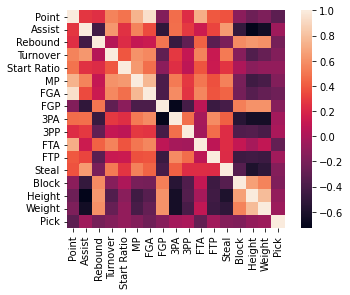

In [ ]:
sns.heatmap(df.corr(),square = True);

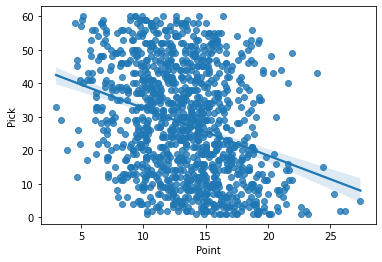

In [ ]:
sns.regplot(data=df, x="Point", y="Pick")

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size=0.8, test_size=0.2,
                                                      random_state=0) 


# Encoding

One-Hot Encoding For Position

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['Position']]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[['Position']]))


OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index


X_train = X_train.drop('Position', axis = 1)
X_valid = X_valid.drop('Position', axis = 1)

X_train = pd.concat([X_train, OH_cols_train], axis=1)
X_valid = pd.concat([X_valid, OH_cols_valid], axis=1)






In [ ]:
X_train

,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,College Name,0,1,2
930,9.7,2.7,3.9,1.9,0.868613,27.7,8.5,0.408,3.2,0.407,2.1,0.711,1.1,0.3,193.0,84.0,8.0,0.0,0.0,1.0
502,15.4,3.2,4.6,2.0,0.992000,37.5,14.4,0.399,5.0,0.292,3.9,0.624,2.3,0.2,198.0,99.0,6.0,0.0,0.0,1.0
1056,9.7,4.3,2.4,1.6,0.915789,26.1,8.4,0.424,2.7,0.353,2.0,0.817,0.7,0.1,190.0,81.0,13.0,0.0,0.0,1.0
955,18.1,4.4,4.1,2.4,0.941176,32.8,11.9,0.507,4.2,0.396,5.4,0.813,1.2,1.4,196.0,87.0,8.0,0.0,0.0,1.0
348,5.7,4.1,4.7,2.2,0.568966,23.2,4.5,0.456,1.0,0.220,2.5,0.527,1.1,0.1,193.0,83.0,7.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,21.0,1.0,9.6,2.0,1.000000,29.8,14.7,0.561,2.8,0.520,4.1,0.757,0.8,2.7,218.0,106.0,13.0,1.0,0.0,0.0
774,16.1,1.0,8.1,1.9,0.885714,27.1,10.8,0.533,2.7,0.375,5.1,0.701,0.7,1.2,203.0,108.0,6.0,0.0,1.0,0.0
846,9.2,0.8,4.8,1.2,0.410448,20.8,6.0,0.517,0.0,0.333,4.2,0.717,0.5,0.7,206.0,113.0,5.0,0.0,1.0,0.0
570,16.9,6.2,2.9,3.0,1.000000,36.5,12.2,0.443,4.1,0.402,5.5,0.808,1.4,0.0,183.0,81.0,20.0,0.0,0.0,1.0


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error as mse

mse(Y_valid,reg.predict(X_valid))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


190.10922353413895


## Elastic Net


In [ ]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()

reg.fit(X_train, Y_train)

pick_pred = reg.predict(X_valid)

mse(Y_valid,pick_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


207.312826931626

# Lasso Regression

In [ ]:
from sklearn import linear_model

Realreg = linear_model.Lasso(alpha=5)

Realreg.fit(X_train,Y_train)

pick_pred = Realreg.predict(X_valid)

mse(Y_valid, pick_pred)

Realreg.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([-1.49128773, -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.29162825,
       -0.        , -0.27796276, -0.        ,  0.        , -0.        ])

# Ridge Regression

In [ ]:
rara = linear_model.Ridge(alpha=1000)

rara.fit(X_train, Y_train)

pick_pred = rara.predict(X_valid)

mse(pick_pred,Y_valid)

rara.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([-1.6997693 , -0.74087755, -0.57879762, -0.19103834,  0.15198224,
        0.29246749,  0.03554806, -0.06746115, -0.0046135 ,  0.04028237,
       -0.62999685,  0.02114001, -0.54047222, -1.0320528 , -0.42737798,
        0.13405048, -0.32395842, -0.07626772,  0.33364399, -0.25737627])

# Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor


reg = DecisionTreeRegressor(random_state = 1)


reg.fit(X_train, Y_train)

pick_pred = reg.predict(X_valid)

pick_pred

mse(Y_valid,pick_pred)


#Decision Trees Have Higher MSE...

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


489.7911111111111

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=9, n_estimators=500)

reg.fit(X_train, Y_train)

pick_pred = reg.predict(X_valid)

mse(pick_pred,Y_valid)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


220.21481356027388

# XGBoost

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor()

reg.fit(X_train,Y_train)

pick_pred = reg.predict(X_valid)

mse(pick_pred,Y_valid)


[21:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


212.11917131650424

# SVM

In [ ]:
from sklearn import svm

reg = svm.SVR(kernel='rbf')

reg.fit(X_train, Y_train)

pick_predict = reg.predict(X_valid)

mse(pick_pred,Y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


212.11917131650424

Best Results Acheived By Lasso Regression, so will be using Lasso Regression to solve the problem...

# Testing

Data Preparation

In [ ]:
testingNames = [['Chet Holmgren','Paolo Banchero','Jabari Smith', 'Jaden Ivey', 'Jalen Duren', 'Keegan Murray', 'Johnny Davis', 'Trevor Keels', 'Bennedict Mathurin', 'JD Davidson', 'Kendall Brown', 'Bryce McGowens', 'Kennedy Chandler', 'Mark Williams', 'Ochai Agbaji', 'EJ Liddell', 'Christian Koloko', 'AJ Griffin', 'Peyton Watson', 'Caleb Houstan', 'Allen Flanigan', 'Christian Braun', 'Tari Eason', 'Harrison Ingram', 'Jeremy Sochan', 'Walker Kessler','Blake Wesley', 'Daimion Collins', 'Justin Lewis', 'Trevion Williams', 'Moussa Diabate', 'Max Christie', 'Andrew Nembhard','Zach Edey', 'Keon Ellis', 'Drew Timme', 'Johnny Juzang' , 'Boogie Ellis', 'Orlando Robinson', 'Jahvon Quinerly', 'Matthew Mayer', 'Mike Miles', 'Marcus Bagley', 'Tyler Burton', 'Jordan Hall', 'Iverson Molinar', 'Jalen Williams', 'Caleb Love', 'Andre Curbelo', 'Max Adams', 'Darryl Morsell','Isaiah Mobley','David Roddy', 'Hyunjung Lee', 'Oscar Tshiebwe', 'Jabari Walker', 'Kofi Cockburn', 'Taevion Kinsey', 'Tevin Brown', 'Azuolas Tubelis', 'Pete Nance', 'Darius Days'],['Gonzaga', 'Duke', 'Auburn', 'Purdue', 'Memphis', 'Iowa', 'Wisconsin', 'Duke', 'Arizona', 'Alabama', 'Baylor', 'Nebraska', 'Tennessee', 'Duke', 'Kansas', 'Ohio State', 'Arizona', 'Duke', 'UCLA', 'Michigan', 'Auburn', 'Kansas', 'LSU', 'Stanford', 'Baylor', 'Auburn', 'Notre Dame', 'Kentucky', 'Marquette', 'Purdue', 'Michigan', 'Michigan State', 'Gonzaga', 'Purdue', 'Alabama', 'Gonzaga', 'UCLA','USC', 'Fresno State', 'Alabama', 'Baylor', 'TCU', 'Arizona State', 'Richmond', "Saint Joseph's", 'Mississippi State', 'Santa Clara', 'North Carolina', 'Illinois', 'Oral Roberts', 'Marquette', 'USC', 'Colorado State', 'Davidson',  'Kentucky', 'Colorado', 'Illinois', 'Marshall', 'Murray State', 'Arizona', 'Northwestern', 'LSU']]

In [ ]:
names = []

def fullData(input):

  print(testingNames)

  data = []
  for i in range(len(input[0])):
    if(getFeatures(input[0][i],input[1][i]) != None):
      names.append(testingNames[0][i])
      data.append(getFeatures(input[0][i],input[1][i]))


  return pd.DataFrame(data)
  
testData = fullData(testingNames)

tester = testData.copy()





[['Chet Holmgren', 'Paolo Banchero', 'Jabari Smith', 'Jaden Ivey', 'Jalen Duren', 'Keegan Murray', 'Johnny Davis', 'Trevor Keels', 'Bennedict Mathurin', 'JD Davidson', 'Kendall Brown', 'Bryce McGowens', 'Kennedy Chandler', 'Mark Williams', 'Ochai Agbaji', 'EJ Liddell', 'Christian Koloko', 'AJ Griffin', 'Peyton Watson', 'Caleb Houstan', 'Allen Flanigan', 'Christian Braun', 'Tari Eason', 'Harrison Ingram', 'Jeremy Sochan', 'Walker Kessler', 'Blake Wesley', 'Daimion Collins', 'Justin Lewis', 'Trevion Williams', 'Moussa Diabate', 'Max Christie', 'Andrew Nembhard', 'Zach Edey', 'Keon Ellis', 'Drew Timme', 'Johnny Juzang', 'Boogie Ellis', 'Orlando Robinson', 'Jahvon Quinerly', 'Matthew Mayer', 'Mike Miles', 'Marcus Bagley', 'Tyler Burton', 'Jordan Hall', 'Iverson Molinar', 'Jalen Williams', 'Caleb Love', 'Andre Curbelo', 'Max Adams', 'Darryl Morsell', 'Isaiah Mobley', 'David Roddy', 'Hyunjung Lee', 'Oscar Tshiebwe', 'Jabari Walker', 'Kofi Cockburn', 'Taevion Kinsey', 'Tevin Brown', 'Azuolas 

In [ ]:
ogCollegeName = tester['College Name']

ting = df['College Name'].value_counts()

print(ting)
ogCollegeName

newCollegeName = []

for vals in ogCollegeName:

  try:
    newCollegeName.append(float(ting[vals]))

  except:
    newCollegeName.append(1)

newCollegeName


tester['College Name'] = newCollegeName

tester

Kentucky        51
Duke            44
UNC             39
UCLA            38
Kansas          36
                ..
Northwestern     1
Penn             1
Old Dominion     1
Loyola (MD)      1
Davidson         1
Name: College Name, Length: 144, dtype: int64


,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,Position,College Name
0,13.4,2.2,8.4,2.1,1.000000,24.9,8.1,0.611,2.8,0.359,3.5,0.714,0.4,3.2,213.0,88.0,Center,12.0
1,17.3,2.3,7.5,2.3,1.000000,29.4,12.0,0.494,2.9,0.341,5.7,0.775,1.4,0.9,208.0,113.0,Forward,44.0
2,16.1,2.1,6.4,1.8,1.000000,26.9,11.6,0.457,5.1,0.457,4.1,0.785,1.5,1.1,208.0,99.0,Forward,7.0
3,10.8,1.2,7.3,2.0,1.000000,24.8,7.0,0.631,0.1,0.000,3.3,0.590,0.8,2.7,211.0,113.0,Center,14.0
4,12.7,0.8,6.0,0.8,0.400000,21.5,8.6,0.557,2.6,0.333,2.8,0.773,1.0,1.5,203.0,97.0,Forward,6.0
5,12.2,2.8,3.6,1.1,1.000000,31.5,10.7,0.400,5.2,0.301,2.9,0.707,1.7,0.0,193.0,100.0,Guard,44.0
6,13.5,1.5,5.4,1.5,0.641026,27.1,9.2,0.487,4.5,0.402,3.4,0.824,0.8,0.2,201.0,88.0,Guard,34.0
7,11.0,1.9,3.8,1.4,1.000000,24.6,6.8,0.679,0.8,0.417,2.1,0.697,1.1,0.3,203.0,92.0,Guard,7.0
8,15.9,1.6,5.5,2.1,1.000000,33.5,12.7,0.394,4.6,0.253,5.6,0.833,0.8,0.5,201.0,81.0,Guard,3.0
9,13.4,5.1,3.1,2.6,1.000000,30.5,11.6,0.438,3.7,0.346,3.0,0.643,2.3,0.4,183.0,78.0,Guard,13.0


In [ ]:

OH_cols = pd.DataFrame(OH_encoder.transform(tester[['Position']]))


OH_cols.index = tester.index



tester = tester.drop('Position', axis = 1)


tester = pd.concat([tester, OH_cols], axis=1)


tester


,Point,Assist,Rebound,Turnover,Start Ratio,MP,FGA,FGP,3PA,3PP,FTA,FTP,Steal,Block,Height,Weight,College Name,0,1,2
0,13.4,2.2,8.4,2.1,1.000000,24.9,8.1,0.611,2.8,0.359,3.5,0.714,0.4,3.2,213.0,88.0,12.0,1.0,0.0,0.0
1,17.3,2.3,7.5,2.3,1.000000,29.4,12.0,0.494,2.9,0.341,5.7,0.775,1.4,0.9,208.0,113.0,44.0,0.0,1.0,0.0
2,16.1,2.1,6.4,1.8,1.000000,26.9,11.6,0.457,5.1,0.457,4.1,0.785,1.5,1.1,208.0,99.0,7.0,0.0,1.0,0.0
3,10.8,1.2,7.3,2.0,1.000000,24.8,7.0,0.631,0.1,0.000,3.3,0.590,0.8,2.7,211.0,113.0,14.0,1.0,0.0,0.0
4,12.7,0.8,6.0,0.8,0.400000,21.5,8.6,0.557,2.6,0.333,2.8,0.773,1.0,1.5,203.0,97.0,6.0,0.0,1.0,0.0
5,12.2,2.8,3.6,1.1,1.000000,31.5,10.7,0.400,5.2,0.301,2.9,0.707,1.7,0.0,193.0,100.0,44.0,0.0,0.0,1.0
6,13.5,1.5,5.4,1.5,0.641026,27.1,9.2,0.487,4.5,0.402,3.4,0.824,0.8,0.2,201.0,88.0,34.0,0.0,0.0,1.0
7,11.0,1.9,3.8,1.4,1.000000,24.6,6.8,0.679,0.8,0.417,2.1,0.697,1.1,0.3,203.0,92.0,7.0,0.0,0.0,1.0
8,15.9,1.6,5.5,2.1,1.000000,33.5,12.7,0.394,4.6,0.253,5.6,0.833,0.8,0.5,201.0,81.0,3.0,0.0,0.0,1.0
9,13.4,5.1,3.1,2.6,1.000000,30.5,11.6,0.438,3.7,0.346,3.0,0.643,2.3,0.4,183.0,78.0,13.0,0.0,0.0,1.0


In [ ]:
picks = list(rara.predict(tester))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
results = {}

for i in range(len(names)):
  results[names[i]] = picks[i]

results



{'AJ Griffin': 32.916466458633764,
 'Allen Flanigan': 42.20177000993917,
 'Andre Curbelo': 40.625376497085966,
 'Azuolas Tubelis': 20.05533107992163,
 'Bennedict Mathurin': 22.487036951615153,
 'Blake Wesley': 32.60566105361677,
 'Bryce McGowens': 27.620517570024575,
 'Caleb Houstan': 35.38089371392839,
 'Chet Holmgren': 18.891519314768516,
 'Christian Braun': 31.744334610124383,
 'Christian Koloko': 29.06641658869904,
 'Daimion Collins': 30.327457171020683,
 'Darius Days': 39.03399360463064,
 'David Roddy': 34.413100895451294,
 'Drew Timme': 24.545279174545627,
 'EJ Liddell': 31.318688661518777,
 'Harrison Ingram': 29.87807480672113,
 'Hyunjung Lee': 37.42251929189263,
 'Isaiah Mobley': 34.276152514982016,
 'Iverson Molinar': 38.88304585317226,
 'Jabari Smith': 23.141658769247286,
 'Jabari Walker': 35.36846918696274,
 'Jalen Duren': 28.61719113177783,
 'Jeremy Sochan': 39.02887472119056,
 'Justin Lewis': 35.51069130567129,
 'Keegan Murray': 31.39811183576778,
 'Kendall Brown': 35.6073

In [ ]:
Results = pd.DataFrame([results]).T.sort_values(by = [0])

In [ ]:
Results

,0
Paolo Banchero,10.112429
Chet Holmgren,18.891519
Azuolas Tubelis,20.055331
Kofi Cockburn,21.093629
Bennedict Mathurin,22.487037
Jabari Smith,23.141659
Mark Williams,23.730163
Drew Timme,24.545279
Orlando Robinson,25.461576
Zach Edey,26.047291


In [ ]:
Results.to_csv('Results.csv')
!cp Results.csv "drive/My Drive/Project Ideas/NBA Salary/Git"